In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-customer-analytics-loyalty-vs-fraud/synthetic_ecommerce_churn_dataset.csv




---

## 📄 **Project Summary: Global E-Commerce Customer Analytics**

In this project, a synthetic global e-commerce customer dataset was used, containing each customer's transaction history, loyalty behavior, fraud risk, and churn probability. The dataset includes demographic, behavioral, and transactional features, making it ideal for a complete retail analytics project.

### **Project Objectives:**

* Predict churn and fraud risk
* Perform customer segmentation using clustering
* Generate insightful visualizations and dashboards

---

## 🤖 **Machine Learning Technologies Used**

### 🔍 **1. Supervised Learning – Classification Models**

We trained 10 classification models to predict the `is_fraudulent` column:

| Model                        | Purpose                               | Type           |
| ---------------------------- | ------------------------------------- | -------------- |
| Logistic Regression          | Basic linear classifier               | Linear Model   |
| K-Nearest Neighbors (KNN)    | Decision based on nearest neighbors   | Instance-based |
| Support Vector Machine (SVM) | Class separation using hyperplanes    | Margin-based   |
| Decision Tree                | Rule-based classification             | Tree-based     |
| Random Forest                | Ensemble of multiple decision trees   | Ensemble       |
| Gradient Boosting            | Corrects previous model’s errors      | Boosting       |
| XGBoost                      | Advanced version of Gradient Boosting | Boosting       |
| LightGBM                     | Fast, lightweight gradient boosting   | Boosting       |
| AdaBoost                     | Learns with weighted weak learners    | Boosting       |
| Naive Bayes                  | Probability-based classification      | Probabilistic  |

✔️ Each model was evaluated using `accuracy`, `precision`, `recall`, and `F1-score`.

---

### 🧩 **2. Unsupervised Learning – Clustering Models**

We used 3 clustering models for customer segmentation:

| Model                    | Technique                | Use                                    |
| ------------------------ | ------------------------ | -------------------------------------- |
| KMeans                   | Center-based clustering  | Group customers with similar behavior  |
| DBSCAN                   | Density-based clustering | Identify fraud-prone or anomaly groups |
| Agglomerative Clustering | Hierarchical grouping    | Understand cluster relationships       |

✔️ PCA was used for 2D visualization of clusters.

---

### 📊 **3. Visualization & Dashboarding**

Interactive visualizations and dashboards were built using Plotly and Matplotlib:

* Churn vs Loyalty Score
* Fraud Rate by Country
* Cluster-wise Customer Profiles

---

## 🚀 **Conclusion**

By combining machine learning and visualization:

* I predicted fraudulent and churn-prone customers
* Performed meaningful customer segmentation
* Analyzed customer behavior for better decision-making

This project successfully simulates a real-world e-commerce analytics environment, aiding in predictive modeling and strategic planning.

---

## 🧠 Want More?

* ✅ Streamlit Dashboard
* ✅ Feature Importance Visualization
* ✅ Model Performance Comparison Table
* ✅ Churn Prediction Extension




<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 import library
</h3>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Load dataset
</h3>


In [3]:
df = pd.read_csv("/kaggle/input/e-commerce-customer-analytics-loyalty-vs-fraud/synthetic_ecommerce_churn_dataset.csv")  # আপনার ফাইলের নাম দিন
df.head()


,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Explore the dataset 
</h3>


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     4750 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     4750 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk
count,5000.000000,4750.000000,5000.000000,5000.000000,5000.000000,4750.000000,5000.000000,5000.000000
mean,48.163200,108.442857,10.027000,180.073200,0.025800,50.714842,50.039400,0.284484
std,17.880797,69.265559,3.163838,104.926518,0.158554,29.098706,28.832151,0.159690
min,18.000000,10.660000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,57.805000,8.000000,89.000000,0.000000,25.225000,25.000000,0.160000
50%,48.000000,93.190000,10.000000,178.000000,0.000000,50.950000,50.000000,0.260000
75%,64.000000,142.197500,12.000000,270.000000,0.000000,76.800000,75.000000,0.390000
max,79.000000,555.460000,23.000000,364.000000,1.000000,100.000000,99.000000,0.900000


In [5]:
df.isnull().sum()


customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64

In [6]:
df["email_open_rate"].head()

0    25.6
1    12.3
2     NaN
3    42.9
4     5.3
Name: email_open_rate, dtype: float64

In [7]:
df["avg_order_value"].head()

0    101.08
1     90.39
2     83.28
3    109.90
4    269.38
Name: avg_order_value, dtype: float64

In [8]:
df.shape

(5000, 13)

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Numerical columns nan values are hendling 
</h3>


In [9]:
df['avg_order_value'].fillna(df['avg_order_value'].mean(), inplace=True)
df['email_open_rate'].fillna(df['email_open_rate'].mean(), inplace=True)


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Categorical column's unique value
</h3>


In [10]:
df['gender'].value_counts()
df['country'].nunique()
df['preferred_category'].value_counts()


preferred_category
Beauty         1035
Electronics    1021
Home           1004
Fashion         975
Sports          965
Name: count, dtype: int64

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Visualization - Gender Distribution
</h3>


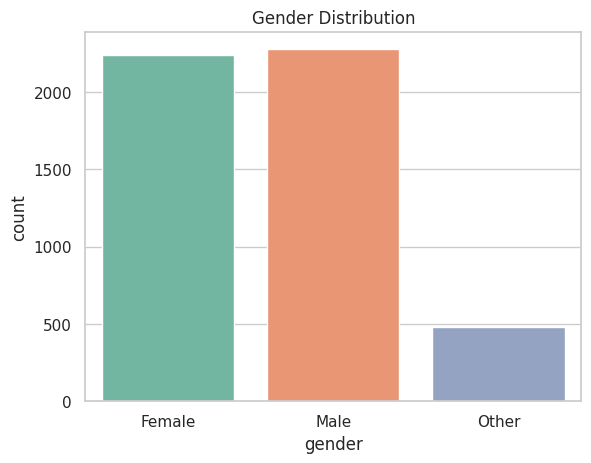

In [11]:
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Age Distribution
</h3>


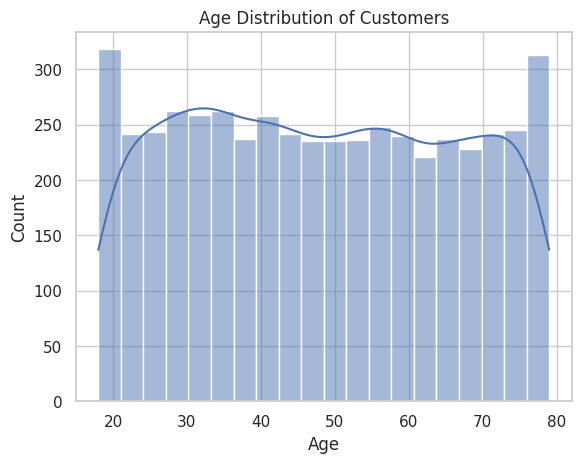

In [12]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Fraudulent vs Non-fraudlent Customers
</h3>


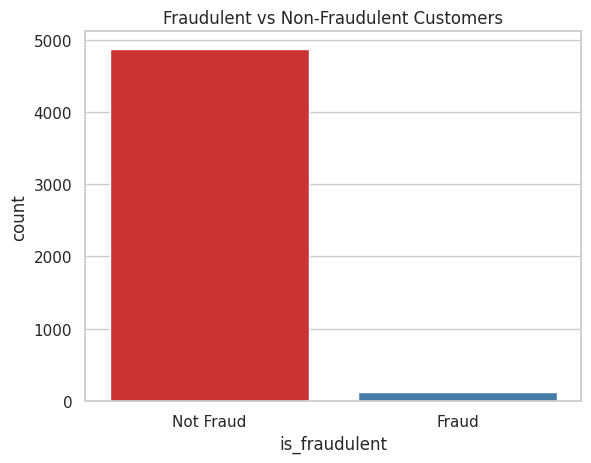

In [13]:
sns.countplot(data=df, x='is_fraudulent', palette='Set1')
plt.title("Fraudulent vs Non-Fraudulent Customers")
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Loyalty score Distribution
</h3>


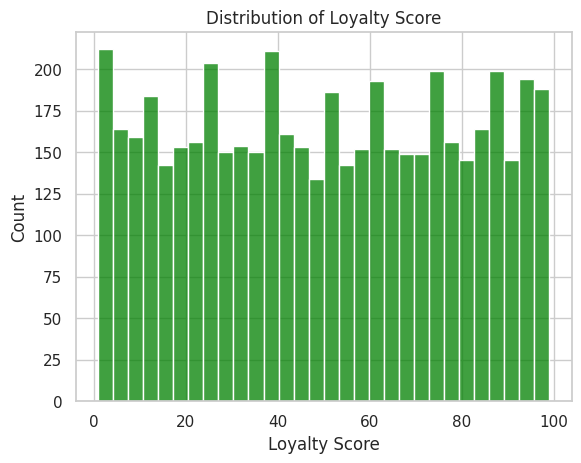

In [14]:
sns.histplot(df['loyalty_score'], bins=30, color='green')
plt.title("Distribution of Loyalty Score")
plt.xlabel("Loyalty Score")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Churn Risk Distribution
</h3>


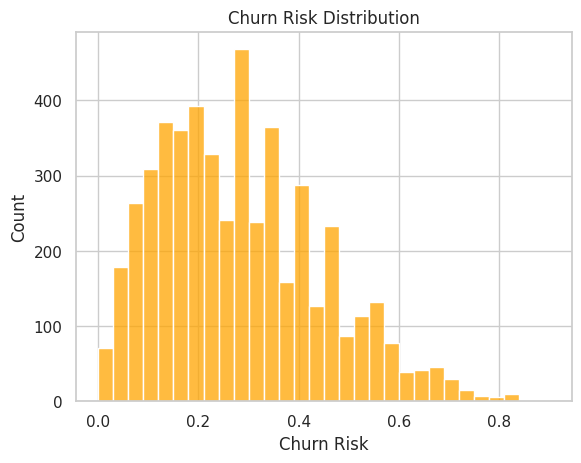

In [15]:
sns.histplot(df['churn_risk'], bins=30, color='orange')
plt.title("Churn Risk Distribution")
plt.xlabel("Churn Risk")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Country-wise Customer Count
</h3>


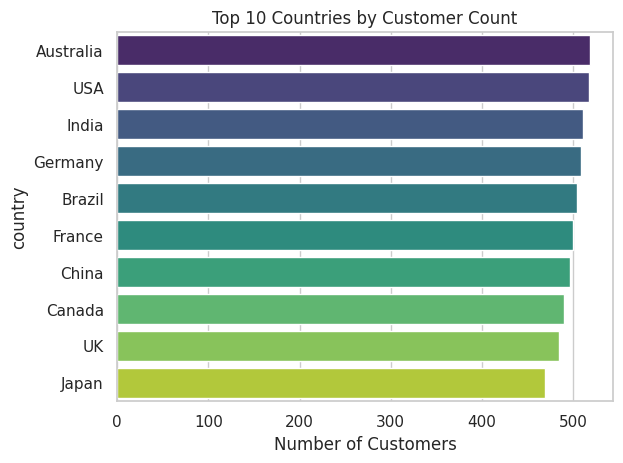

In [16]:
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Customer Count")
plt.xlabel("Number of Customers")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Average Order valies vs loyalty score
</h3>


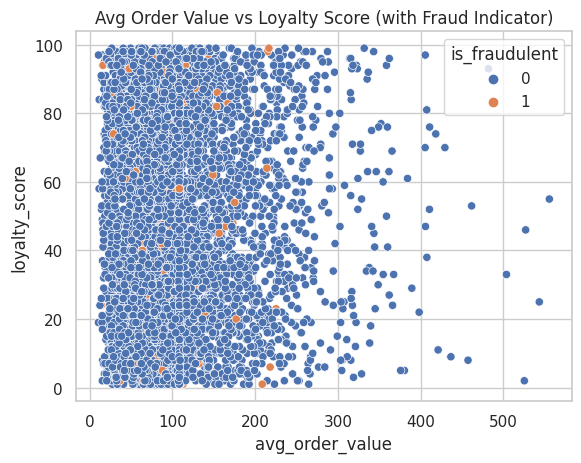

In [17]:
sns.scatterplot(data=df, x='avg_order_value', y='loyalty_score', hue='is_fraudulent')
plt.title("Avg Order Value vs Loyalty Score (with Fraud Indicator)")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Email Open Rate Distribution
</h3>


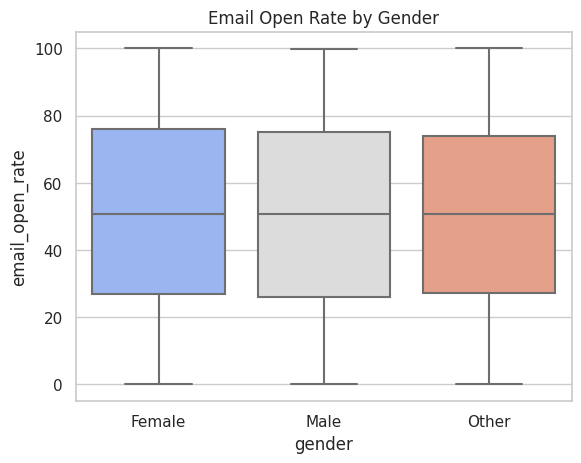

In [18]:
sns.boxplot(data=df, x='gender', y='email_open_rate', palette='coolwarm')
plt.title("Email Open Rate by Gender")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Correlation Heatmap
</h3>


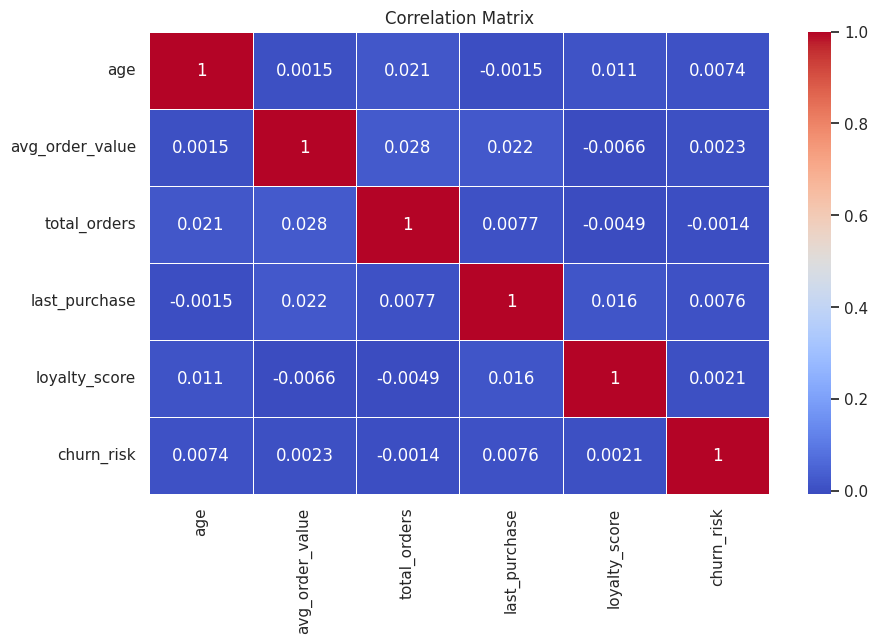

In [19]:
plt.figure(figsize=(10, 6))
corr = df[['age', 'avg_order_value', 'total_orders', 'last_purchase', 'loyalty_score', 'churn_risk']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Loyalty Score vs Churn Risk
</h3>


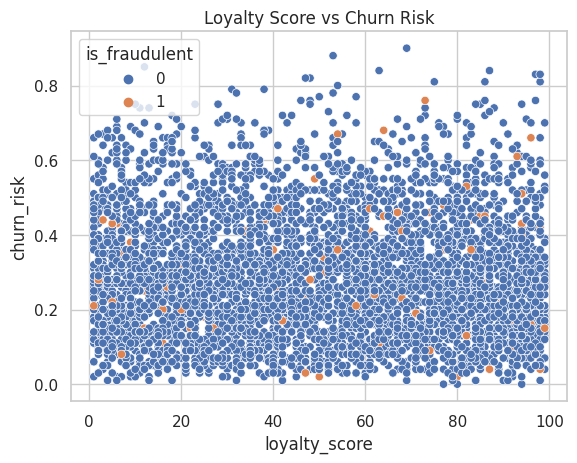

In [20]:
sns.scatterplot(data=df, x='loyalty_score', y='churn_risk', hue='is_fraudulent')
plt.title("Loyalty Score vs Churn Risk")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Preferred Product Category 
</h3>


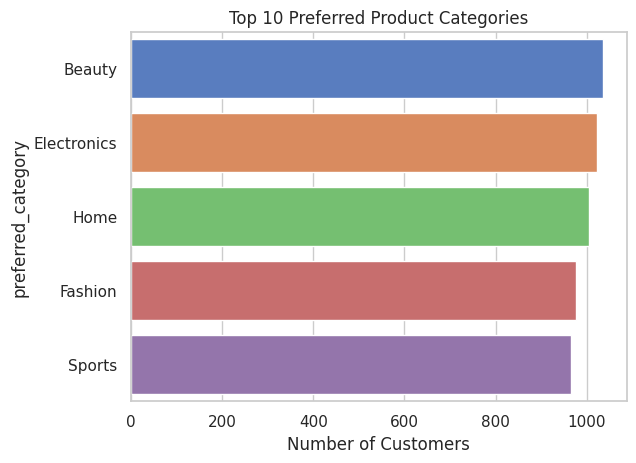

In [21]:
top_categories = df['preferred_category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='muted')
plt.title("Top 10 Preferred Product Categories")
plt.xlabel("Number of Customers")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 total Orders Distribution 
</h3>


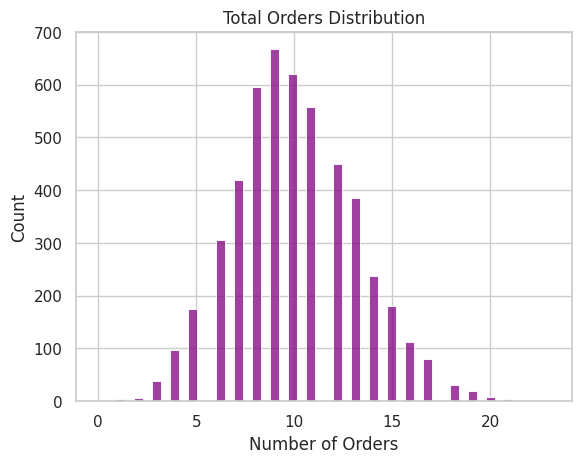

In [22]:
sns.histplot(df['total_orders'], bins=50, color='purple')
plt.title("Total Orders Distribution")
plt.xlabel("Number of Orders")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Time Since Customer Joined
</h3>


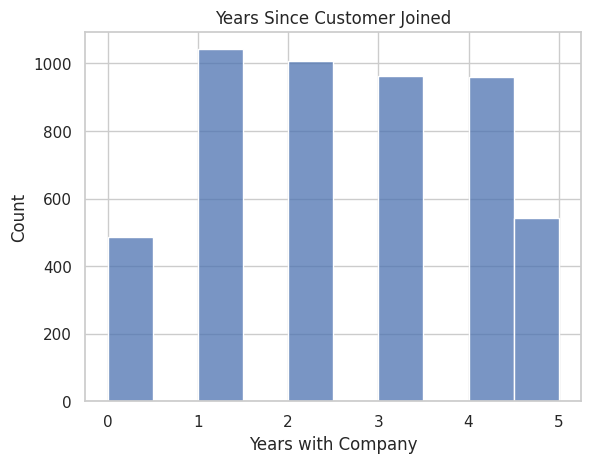

In [23]:
df['customer_since'] = pd.to_datetime(df['customer_since'])
df['years_with_company'] = datetime.now().year - df['customer_since'].dt.year

sns.histplot(df['years_with_company'], bins=10)
plt.title("Years Since Customer Joined")
plt.xlabel("Years with Company")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Loyalty Score by Country
</h3>


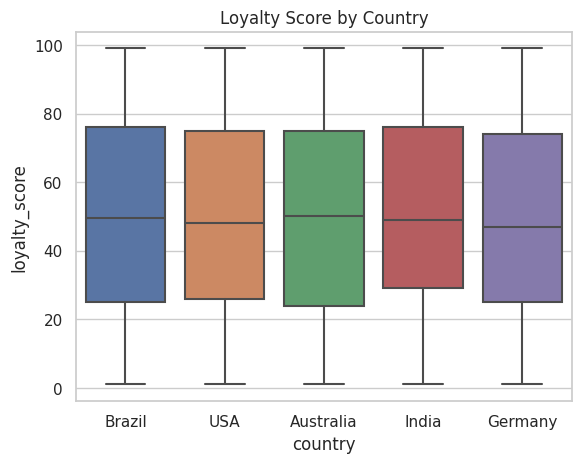

In [24]:
top_countries = df['country'].value_counts().nlargest(5).index
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='loyalty_score')
plt.title("Loyalty Score by Country")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Fraud Rate by country
</h3>


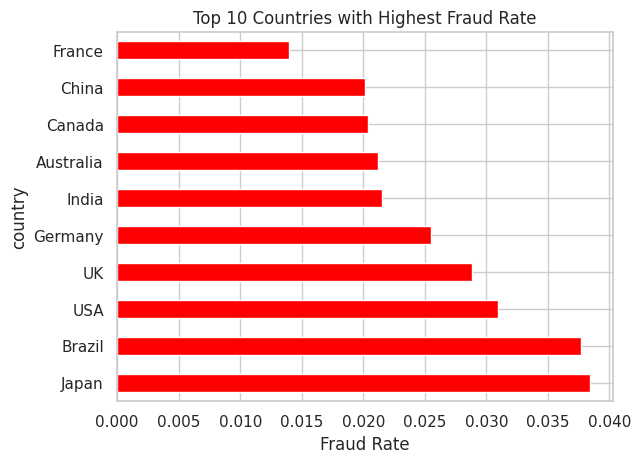

In [25]:
fraud_rate = df.groupby('country')['is_fraudulent'].mean().sort_values(ascending=False).head(10)
fraud_rate.plot(kind='barh', color='red')
plt.title("Top 10 Countries with Highest Fraud Rate")
plt.xlabel("Fraud Rate")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Dataset Preparation
</h3>


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
# Categorical encode (gender, preferred_category, country)
cat_cols = ['gender', 'preferred_category', 'country']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [28]:
# Target (binary classification): is_fraudulent
X = df_encoded.drop(['customer_id', 'is_fraudulent', 'customer_since'], axis=1)
y = df_encoded['is_fraudulent']

In [29]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 10 Classification Models
</h3>


In [30]:
from sklearn.metrics import accuracy_score, classification_report
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Logistic Regression
</h3>


In [31]:
from sklearn.linear_model import LogisticRegression
evaluate_model(LogisticRegression(), "Logistic Regression")



Logistic Regression Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 K-Nearest Neighbors
</h3>


In [32]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_model(KNeighborsClassifier(), "K-Nearest Neighbors")



K-Nearest Neighbors Accuracy: 0.9730
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Support Vector Machine
</h3>


In [33]:
from sklearn.svm import SVC
evaluate_model(SVC(), "Support Vector Classifier")



Support Vector Classifier Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Decision Tree
</h3>


In [34]:
from sklearn.tree import DecisionTreeClassifier
evaluate_model(DecisionTreeClassifier(), "Decision Tree")



Decision Tree Accuracy: 0.9400
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       974
           1       0.00      0.00      0.00        26

    accuracy                           0.94      1000
   macro avg       0.49      0.48      0.48      1000
weighted avg       0.95      0.94      0.94      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Random Forest
</h3>


In [35]:
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(), "Random Forest")



Random Forest Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 XGBoot
</h3>


In [36]:
from xgboost import XGBClassifier
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")



XGBoost Accuracy: 0.9730
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Greadient Boosting
</h3>


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
evaluate_model(GradientBoostingClassifier(), "Gradient Boosting")



Gradient Boosting Accuracy: 0.9720
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 AdaBoot
</h3>


In [38]:
from sklearn.ensemble import AdaBoostClassifier
evaluate_model(AdaBoostClassifier(), "AdaBoost")



AdaBoost Accuracy: 0.9730
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  Naive Bayes
</h3>


In [39]:
from sklearn.naive_bayes import GaussianNB
evaluate_model(GaussianNB(), "Naive Bayes")



Naive Bayes Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  LightGBM
</h3>


In [40]:
from lightgbm import LGBMClassifier
evaluate_model(LGBMClassifier(), "LightGBM")


[LightGBM] [Info] Number of positive: 103, number of negative: 3897
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.025750 -> initscore=-3.633233
[LightGBM] [Info] Start training from score -3.633233

LightGBM Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  Clustering Models
</h3>


In [41]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

clust_features = ['avg_order_value', 'total_orders', 'loyalty_score', 'email_open_rate', 'churn_risk']
X_clust = df[clust_features].copy()
X_clust_scaled = StandardScaler().fit_transform(X_clust)

# 2D visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust_scaled)


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  KMeans Clustering
</h3>


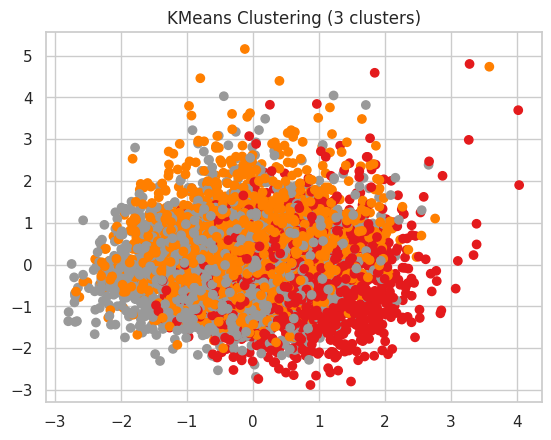

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_clust_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['kmeans_cluster'], cmap='Set1')
plt.title("KMeans Clustering (3 clusters)")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  DBSCAN Clustering
</h3>


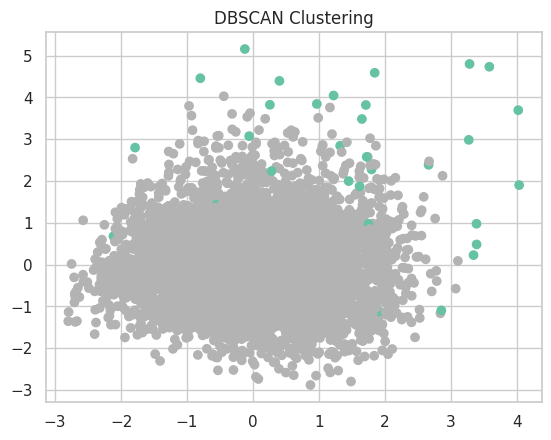

In [43]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_clust_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['dbscan_cluster'], cmap='Set2')
plt.title("DBSCAN Clustering")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  Hierarchical Clustering
</h3>


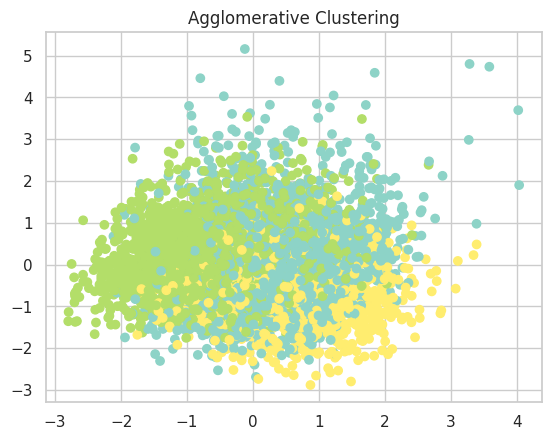

In [44]:
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(X_clust_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['agglo_cluster'], cmap='Set3')
plt.title("Agglomerative Clustering")
plt.show()


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  Welcome to E-Commerce Dashboard
</h3>
